# News Article Classification

## 1. Task description

You will work on a news article classification task.
The provided dataset includes a total of 800 articles taken from Reuters newswire.
They belong to 4 classes: "earn" (1), "crude" (2), "trade" (3) and "interest" (4).
There are 200 articles per class.
Each article is characterised by word occurrences.
The list of used words is called a vocabulary.
In our dataset, the vocabulary includes a total of 6428 words. 

## 2. Preparation

First we need to import the data.
Run the below cell to load the data using NumPy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse

data, labels, class_names, vocabulary = np.load("ReutersNews_4Classes_sparse.npy", allow_pickle=True)

### A Note on Sparsity

Most documents only contain a small subset of the vocabulary, resulting in a very sparse data matrix.
To take advantage of the sparsity, in this exercise `data` is represented as a `scipy.sparse.csr_matrix`, which can store sparse matrices efficiently while still allowing efficient row-based indexing.
You can learn more about `csr_matrix` and other ways of dealing with sparse matrices at https://docs.scipy.org/doc/scipy/reference/sparse.html.

Note, however, that `data` is **not** a normal NumPy array.
While most operations will be the same as with a normal dense array, **you cannot use a sparse matrix to index another matrix**.
If you need to do this, either first convert the matrix to a NumPy array with the `toarray()` method, or use methods specifically designed to work with sparse matrices.

In [2]:
print(data[41]) # Sparse, will print the non-zero indices and their values.
print(data[41].toarray()) # Convert back to a NumPy array. Note that the result is a (1, 6428) matrix, not a vector.
# print(vocabulary[data[41,:] > 0]) # Can't index vocabulary with a sparse matrix.
rows, columns, values = scipy.sparse.find(data[41,:]) # Find the non-zero entries in the 42nd document.
print(vocabulary[columns]) # Prints the words present in the 42nd document.

  (0, 2)	1
  (0, 3)	3
  (0, 5)	1
  (0, 8)	1
  (0, 10)	1
  (0, 11)	1
  (0, 12)	1
  (0, 13)	1
  (0, 21)	2
  (0, 24)	1
  (0, 105)	1
  (0, 127)	1
  (0, 227)	1
  (0, 275)	1
  (0, 334)	2
  (0, 341)	1
  (0, 348)	1
  (0, 359)	1
  (0, 411)	1
  (0, 426)	1
  (0, 1428)	1
  (0, 2058)	1
  (0, 5555)	1
[[0 0 1 ... 0 0 0]]
['share' 'split' 'say' 'two-for-one' 'shareholder' 'annual' 'meeting'
 'reuter' 'ct' 'note' 'company' 'pay' 'subject' 'increase' 'stock'
 'dividend' 'april' 'northern' 'declare' 'approval' 'telecom' 'post-split'
 'nt']


To see the full vocabulary, you can run

In [3]:
print(", ".join(vocabulary))

island, telephone, share, split, approve, say, previously, announce, two-for-one, common, shareholder, annual, meeting, reuter, year, net, shr, loss, nil, vs, profit, ct, rev, mln, note, current, include, charge, discontinue, operation, dlr, ec, state, tax, majority, european, community, member, strong, reservation, import, domestically-produced, oil, fat, propose, commission, senior, diplomat, special, committee, agricultural, expert, voice, objection, measure, prepare, ground, farm, begin, monday, add, france, italy, indicate, support, proposal, lead, initially, tonne, 1987/88, price, round, complete, sale, french, unit, business, compagnie, francaise, group, investor, employee, minnesota, disclose, term, deal, plan, asset, electronic, shoe, town, end, jan, respectively, december, wisconsin, fwb, buy, bank, corp, acquire, bancshare, cash, acquisition, hold, company, total, billion, purchase, time, earning, office, paul, area, american, product, 3rd, qtr, period, feb, mth, avg, 4th, s

You can see how many times article $i$ contains word $j$ using

In [4]:
i, j = 40, 2
print(data[i,j])

4


You can see which class the $i$th article belongs to using

In [5]:
print(labels[i])

0


For instance, by running

In [6]:
print("Occurrences:", data[0,10])
print("Class:", class_names[labels[0]])
print("Word:", vocabulary[10])

Occurrences: 2
Class: earn
Word: shareholder


you can see that the 11th word appears twice in the first document, the first document belongs to the class "earn", and the 11th word is "shareholder".

The following function randomly selects a subset of the data.

In [7]:
def sample_indices(labels, *num_per_class):
    """
    Returns randomly selected indices. It will return the specified number of indices for each class.
    """
    indices = []
    for cls, num in enumerate(num_per_class):
        cls_indices = np.where(labels == cls)[0]
        indices.extend(np.random.choice(cls_indices, size=num, replace=False))
    return np.array(indices)

For instance, to get one sample from the first class, two from the second, three from the third, and four from the fourth, you can run:

In [8]:
indices = sample_indices(labels, 1, 2, 3, 4)
print("Returned indices:", indices)
print("Samples:", data[indices])
print("Corresponding classes:", labels[indices])

Returned indices: [ 17 208 348 437 504 516 720 792 659 779]
Samples:   (0, 6116)	1
  (0, 1264)	1
  (0, 122)	1
  (0, 121)	1
  (0, 117)	1
  (0, 107)	1
  (0, 79)	1
  (0, 30)	2
  (0, 23)	3
  (0, 22)	2
  (0, 21)	2
  (0, 19)	7
  (0, 16)	3
  (0, 15)	3
  (0, 14)	1
  (0, 13)	1
  (1, 6166)	1
  (1, 6165)	1
  (1, 6084)	1
  (1, 5707)	1
  (1, 5706)	1
  (1, 5459)	1
  (1, 4723)	1
  (1, 4688)	1
  (1, 4549)	1
  :	:
  (8, 60)	1
  (8, 46)	1
  (8, 38)	1
  (8, 25)	2
  (8, 24)	2
  (8, 13)	1
  (8, 5)	13
  (9, 3192)	1
  (9, 2854)	1
  (9, 2699)	2
  (9, 1844)	1
  (9, 1634)	2
  (9, 984)	4
  (9, 703)	1
  (9, 668)	2
  (9, 601)	2
  (9, 568)	1
  (9, 429)	1
  (9, 363)	1
  (9, 332)	2
  (9, 253)	1
  (9, 152)	2
  (9, 99)	1
  (9, 24)	1
  (9, 13)	1
Corresponding classes: [0 1 1 2 2 2 3 3 3 3]


## 3. k-NN implementation

Now, you will need to implement a k-NN classifier by filling the code below.
This function should support two types of distance measures: Euclidean distance and cosine distance.
It should take a set of training samples, a user-specified neighour number, a distance option, and features of a set of testing samples as the input.
It should return the predicted classes for the input set of testing samples.

In order to complete this function, you will need the `sklearn.metrics.pairwise_distances` function which can handle sparse matrices, below imported as `cdist` to follow SciPy conventions (not to be confused with the `pdist` function).
You should also research NumPy functions relating to sorting.

**Your implementation must NOT make use of Python loops over individual samples**.
You should use functions that operate on whole matrices, as this will be much faster than looping in Python.

In [9]:
import scipy.stats
from sklearn.metrics import pairwise_distances as cdist

def knn_classify(test_samples, training_data, training_labels, metric="euclidean", k=1):
    """
    Performs k-nearest neighbour classification on the provided samples,
    given training data and the corresponding labels.
    
    test_samples: An m x d matrix of m samples to classify, each with d features.
    training_data: An n x d matrix consisting of n training samples, each with d features.
    training_labels: A vector of size n, where training_labels[i] is the label of training_data[i].
    metric: The metric to use for calculating distances between samples.
    k: The number of nearest neighbours to use for classification.
    
    Returns: A vector of size m, where out[i] is the predicted class of test_samples[i].
    """
    # Calculate an m x n distance matrix.
    pairwise_distance = cdist(test_samples, training_data, metric)
    
    # Find the k nearest neighbours of each samples as an m x k matrix of indices.
    nearest_neighbours = np.argsort(pairwise_distance, axis = 1)[:,:k]
    
    # Look up the classes corresponding to each index.
    nearest_labels = training_labels[nearest_neighbours]
    
    # Return the most frequent class on each row.
    # Note: Ensure that the returned vector does not contain any empty dimensions.
    # You may find the squeeze method useful here.
    return np.squeeze(scipy.stats.mode(nearest_labels, axis = 1)[0])

## 4. Experiments

Use your k-NN function to perform the following experiments.

### Experiment 1

Randomly select 80 articles per class for training, and use the remaining articles for testing.
Select an appropriate neighbour number.
Train your k-NN classifier using the Euclidean distance and test it.
Repeat this process 20 times (trials).
Calculate the mean and standard deviation of the testing accuracies.

In [10]:
#Array for the accuracies
accuracies = []
#Repeating the experiment 20 times
for i in range(1, 21):
    #We are selecting 80 random articles per class for training
    train_samples = sample_indices(labels, 80, 80, 80, 80)
    #Creating variables for the train and test samples, data and labels
    train_data = data[train_samples]
    test_samples = np.setdiff1d(np.arange(800), train_samples)#np.delete(labels, train_samples)
    test_data = data[test_samples]
    training_labels = labels[train_samples]
    test_labels = labels[test_samples]
    #Choosing a k for the k-nn classifier and the distance method
    neighbour_number = 1
    metric="euclidean"
    
    #We are using the 1-nn classifier by doing the euclidean distance and storing the predicted data in an array
    test = knn_classify(test_data, train_data, training_labels, metric, neighbour_number)
    #Creating variable for counting the accuracies
    correct = 0
    #Boolean matrix for checking accuracies
    E = (test_labels == test)
    for j in range (test.size):
        #all_samples = all_samples + 1
        if(E[j] == True):
            correct = correct + 1
    #Adding the accuracy for the given i
    accuracies.append((correct / 480))
#Printing the result

print("The standard diviation is: ", np.std(accuracies))
print("The mean is: ", np.mean(accuracies))

The standard diviation is:  0.016192472959852534
The mean is:  0.8931249999999998


Use the same neighbour number, but use the cosine distance instead of the Euclidean distance.
Repeat the same experiment.

In [11]:
#Array for the accuracies
accuracies = []
#Repeating the experiment 20 times
for i in range(1, 21):
    #We are selecting 80 random articles per class for training
    train_samples = sample_indices(labels, 80, 80, 80, 80)
    #Creating variables for the train and test samples, data and labels
    train_data = data[train_samples]
    test_samples = np.setdiff1d(np.arange(800), train_samples)
    test_data = data[test_samples]
    training_labels = labels[train_samples]
    test_labels = labels[test_samples]
    #Choosing a k for the k-nn classifier and the distance method
    neighbour_number = 1
    metric="cosine"
    
    #We are using the k-nn classifier by doing the cosine distance and storing the predicted data in an array
    test = knn_classify(test_data, train_data, training_labels, metric, neighbour_number)
    #Creating variable for counting the accuracies
    correct = 0
    #Boolean matrix for checking accuracies
    E = (test_labels == test)
    for j in range (test.size):
        #all_samples = all_samples + 1
        if(E[j] == True):
            correct = correct + 1
    #Adding the accuracy for the given i
    accuracies.append((correct / 480))
#Printing the result
print("The standard diviation is: ", np.std(accuracies))
print("The mean is: ", np.mean(accuracies))

The standard diviation is:  0.007582732347980576
The mean is:  0.9646874999999999


Which distance measure gives better performance?

### Experiment 2

Using the distance measure that you found performs better, repeat the same experiment, varying the neighbour number $k$ from 1 to 50.
This time, record the average training errors and standard deviation over 20 trials, for different values of $k$.
Do the same for testing errors.

In [12]:
#Cresting arrays for storing 
training_accuracies = []
testing_accuracies = []
accuracies_testing_array = []
accuracies_training_array = []
total_testing_accuracies = []
total_training_accuracies = []
#Repeating the experiment for k from 1 to 50
for neighbour_number in range(1, 51):
    for i in range(1, 21):
        #We are selecting 80 random articles per class for training
        train_samples = sample_indices(labels, 80, 80, 80, 80)
        #Creating variables for the train and test samples, data and labels
        train_data = data[train_samples]
        test_samples = np.setdiff1d(np.arange(800), train_samples)
        test_data = data[test_samples]
        training_labels = labels[train_samples]
        test_labels = labels[test_samples]
        train_labels = labels[train_samples]
        #Using cosine distance method
        metric="cosine"
        
        #We are using the k-nn classifier by doing the cosine distance 
        #and storing the predicted data for the training and testing samples in an array
        test_testing = knn_classify(test_data, train_data, training_labels, metric, neighbour_number)
        test_training = knn_classify(train_data, train_data, training_labels, metric, neighbour_number)
        
        #Creating variable for counting the accuracies
        correct = 0
        correct2 = 0
        
        #Boolean matrices for checking accuracies (both testing and training) 
        #and adding the output to the coresponding array
        E = (test_labels == test_testing)
        for j in range (test_testing.size):
            if(E[j] == True):
                correct = correct + 1
        testing_accuracies.append((correct / 480))
        
        Er = (train_labels == test_training)
        for j in range (test_training.size):
            if(Er[j] == True):
                correct2 = correct2 + 1
        training_accuracies.append((correct2 / 320))
    #Printing the standard diviation for every k
    print("The standard diviation for k = ", neighbour_number, " is:", np.std(training_accuracies))
    #Adding the average of all accuracies of 1 k to the coresponding array
    total_training_accuracies.append(np.average(training_accuracies))
    accuracies_training_array.append(np.std((training_accuracies)))
    #We are reusing the array containing training accuries
    training_accuracies = []
    
    #Adding the average of all accuracies of 1 k to the coresponding array    
    total_testing_accuracies.append(np.average(testing_accuracies))
    accuracies_testing_array.append(np.std((testing_accuracies)))
    #We are reusing the array containing training accuries
    testing_accuracies = []
#print(total_training_errors)
print("The overall standard diviation for testing is: ", np.std(total_testing_accuracies))
print("The overall standard diviation for training is: ", np.std(total_training_accuracies))
#print("The other standard diviation")

The standard diviation for k =  1  is: 0.0
The standard diviation for k =  2  is: 0.005026783731920453
The standard diviation for k =  3  is: 0.005869262490935292
The standard diviation for k =  4  is: 0.006709659547994965
The standard diviation for k =  5  is: 0.008908990806342764
The standard diviation for k =  6  is: 0.00810544521833934
The standard diviation for k =  7  is: 0.009136283691277329
The standard diviation for k =  8  is: 0.005179870141953371
The standard diviation for k =  9  is: 0.009158969306095532
The standard diviation for k =  10  is: 0.007911868063232614
The standard diviation for k =  11  is: 0.006515831081872822
The standard diviation for k =  12  is: 0.008776466668739765
The standard diviation for k =  13  is: 0.005700448858423347
The standard diviation for k =  14  is: 0.010048709494258458
The standard diviation for k =  15  is: 0.0097264840609287
The standard diviation for k =  16  is: 0.009447635286144371
The standard diviation for k =  17  is: 0.00771185167

Produce an error bar plot showing the training accuracy for each $k$ here:

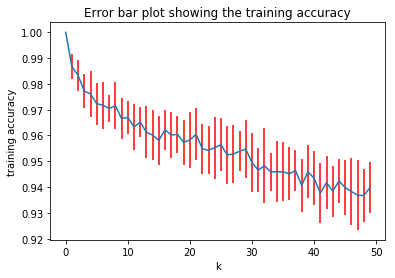

In [13]:
#Creating error plot that displays the training accuracy
x = np.arange(50)
y = total_training_accuracies
plt.title('Error bar plot showing the training accuracy')
y_err = accuracies_training_array
plt.errorbar(x, y, yerr=y_err, ecolor='r')
plt.xlabel('k')
plt.ylabel('training accuracy')
plt.show()

Produce your testing error bar plot here:

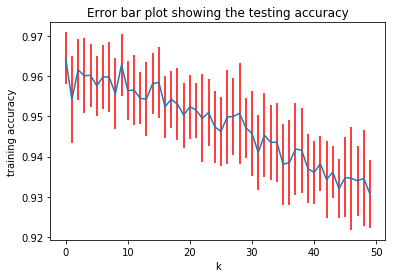

In [14]:
#Creating error plot that displays the testing accuracy
x = np.arange(50)
y = total_testing_accuracies
plt.title('Error bar plot showing the testing accuracy')
y_err = accuracies_testing_array
plt.errorbar(x, y, yerr=y_err, ecolor='r')
plt.xlabel('k')
plt.ylabel('training accuracy')
plt.show()

**Remember that all graphs should have axis labels and a title.**

Now, answer a few questions according to what you have observed.

Q1. What is the training accuracy obtained when $k=1$? Explain it.

Q2. Do the testing and training accuracies differ, and why?

Q3. How do the accuracies change as $k$ gets bigger, and why?

### Experiment 3

Compare three 5-NN classifiers using cosine distance.
First, randomly select 100 articles per class and keep these as your testing samples.

In [15]:
#We are selecting 100 random articles per class for training
testing_samples = sample_indices(labels, 100, 100, 100, 100)

Then do the following:

(1) Train the first classifier using all the remaining articles.
Compute the confusion matrix for the 4 classes using the testing samples.

In [16]:
#Creating variables for the train and test samples, data and labels
test_data = data[testing_samples]
train_samples = np.setdiff1d(np.arange(800), testing_samples)
train_data = data[train_samples]
training_labels = labels[train_samples]
neighbour_number = 5
test_labels = labels[testing_samples]
#We are using cosine difference
metric="cosine"
#We are using the 5-nn classifier by doing the cosine distance 
#and storing the predicted data in an array
test = knn_classify(test_data, train_data, training_labels, metric, neighbour_number)

#Creating a matrix full of zeros
arr = np.zeros([4,4])
#For-loop for filling the confusion matrix
for j in range(0, 400):
    arr[test_labels[j]][test[j]] = arr[test_labels[j]][test[j]] + 1
#Printing the matrix
print(arr)
#For-loop for doing the confusion matrix of 1 class
for i in range(0,4):
    tp = arr[i][i]
    fn = np.sum(arr[i]) - tp
    fp = np.sum(arr[:, i:i+1]) - tp
    tn = 400 - tp - fp - fn
    #Printing the matrices
    print("Class", i)
    print(tp, fp)
    print(fn, tn)

[[97.  0.  1.  2.]
 [ 0. 99.  1.  0.]
 [ 3.  2. 93.  2.]
 [ 0.  0.  1. 99.]]
Class 0
97.0 3.0
3.0 297.0
Class 1
99.0 1.0
1.0 299.0
Class 2
93.0 7.0
7.0 293.0
Class 3
99.0 1.0
1.0 299.0


(2) Randomly remove 95 training articles from class 2.
Train the second classifier using the reduced training samples.
Compute the confusion matrix for the 4 classes using the testing samples.

In [22]:
#Creating variables for the train and test samples, data and labels
removed_train = sample_indices(test_labels, 0, 95, 0, 0)
new_train_samples = np.delete(train_samples, removed_train)
new_train_data = data[new_train_samples]
new_training_labels = labels[new_train_samples]

#We are using the 5-nn classifier by doing the cosine distance 
#and storing the predicted data in an array
test2 = knn_classify(test_data, new_train_data, new_training_labels, metric, neighbour_number)

#Making our existing matrix full of zeros
arr = np.zeros([4,4])

#For-loop for filling the confusion matrix
for j in range(0, 400):
    arr[test_labels[j]][test2[j]] = arr[test_labels[j]][test2[j]] + 1
    
#Printing the matrix
print(arr)
#For-loop for doing the confusion matrix of 1 class
for i in range(0,4):
    tp = arr[i][i]
    fn = np.sum(arr[i]) - tp
    fp = np.sum(arr[:, i:i+1]) - tp
    tn = 400 - tp - fp - fn
    #Printing the matrices
    print("Class", i)
    print(tp, fp)
    print(fn, tn)


[[97.  0.  1.  2.]
 [34. 26. 23. 17.]
 [ 3.  1. 93.  3.]
 [ 0.  0.  1. 99.]]
Class 0
97.0 37.0
3.0 263.0
Class 1
26.0 1.0
74.0 299.0
Class 2
93.0 25.0
7.0 275.0
Class 3
99.0 22.0
1.0 278.0


(3) Redo (2), but randomly remove 95 training articles from *all* the classes.
Train the third classifier using the new training data.
Compute the confusion matrix for the 4 classes using the testing samples.

In [23]:
#Creating variables for the train and test samples, data and labels
removed_train = sample_indices(test_labels, 95, 95, 95, 95)
new_train_samples = np.delete(train_samples, removed_train)
new_train_data = data[new_train_samples]
new_training_labels = labels[new_train_samples]

#We are using the 5-nn classifier by doing the cosine distance 
#and storing the predicted data in an array
test2 = knn_classify(test_data, new_train_data, new_training_labels, metric, neighbour_number)

#Making our existing matrix full of zeros
arr = np.zeros([4,4])

#For-loop for filling the confusion matrix
for j in range(0, 400):
    arr[test_labels[j]][test2[j]] = arr[test_labels[j]][test2[j]] + 1
    
#Printing the matrix
print(arr)
#For-loop for doing the confusion matrix of 1 class
for i in range(0,4):
    tp = arr[i][i]
    fn = np.sum(arr[i]) - tp
    fp = np.sum(arr[:, i:i+1]) - tp
    tn = 400 - tp -fp - fn
    #Printing the matrices
    print("Class", i)
    print(tp, fp)
    print(fn, tn)


[[96.  1.  2.  1.]
 [12. 47. 40.  1.]
 [ 8.  3. 88.  1.]
 [ 2.  2. 14. 82.]]
Class 0
96.0 22.0
4.0 278.0
Class 1
47.0 6.0
53.0 294.0
Class 2
88.0 56.0
12.0 244.0
Class 3
82.0 3.0
18.0 297.0


Repeat the whole thing a few times.
Which of the three classifiers performs the worst?
Try to analyse why this might be.